In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [29]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005282,0.003144,-79.299389,-75.009448,-68.133388,11.166000,2.586119,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001686,0.000501,-75.511329,-73.411862,-60.405989,15.105340,10.906407,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.005399,0.004043,-76.601709,-73.345940,-65.414446,11.187263,4.675725,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.002219,0.012165,-80.446334,-67.731448,-55.749502,24.696832,-0.732940,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002736,0.001597,-75.575598,-65.232594,-55.730088,19.845510,-0.840498,0.000347,-0.000030,1708.0


### Decision Trees 

In [30]:
# define parameters for model pipeline
estimator = DecisionTreeRegressor()
param_grid = {"max_depth": [2, 3, 4, 5],
            "min_samples_split": [2, 3, 4, 5]}
algo = utils_models.fit_tree_based_regression
fname = 'decision_trees'

0 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.0 seconds
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.0 seconds
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.0 seconds
74 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.0 seconds
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.0 seconds
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.0 seconds


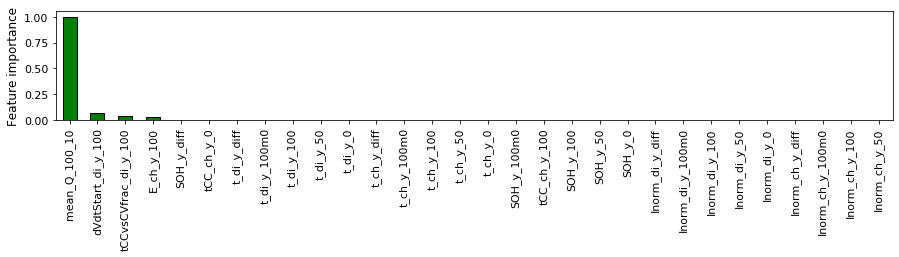

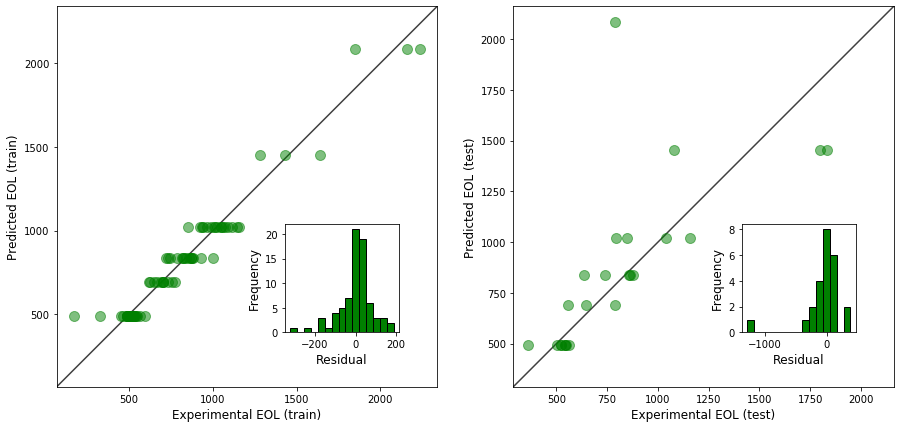

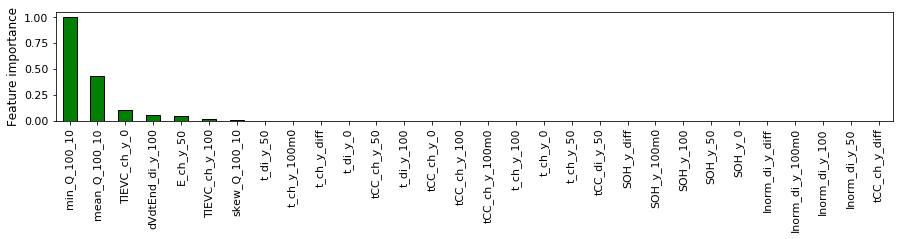

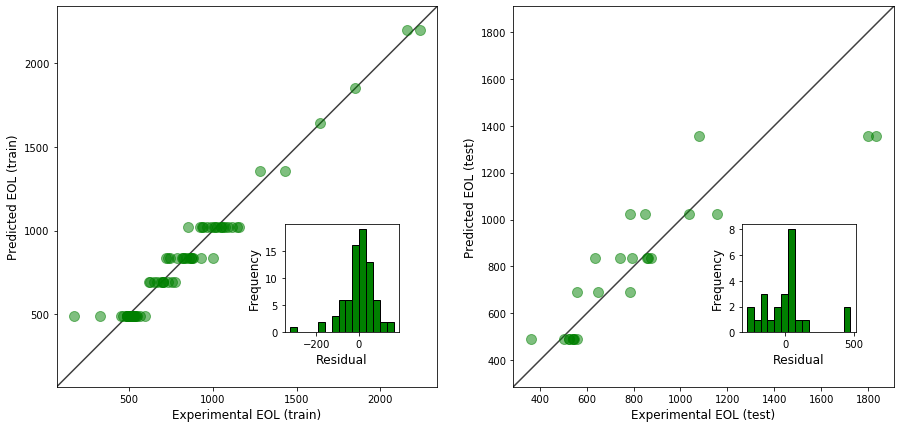

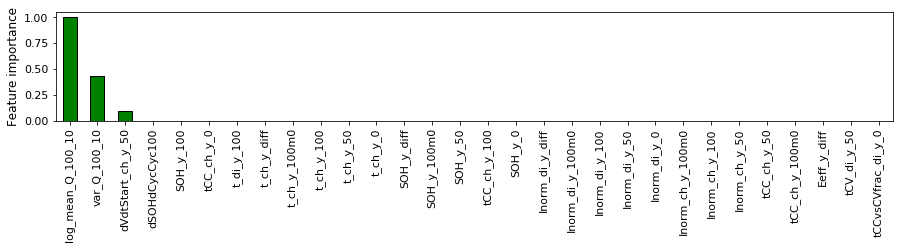

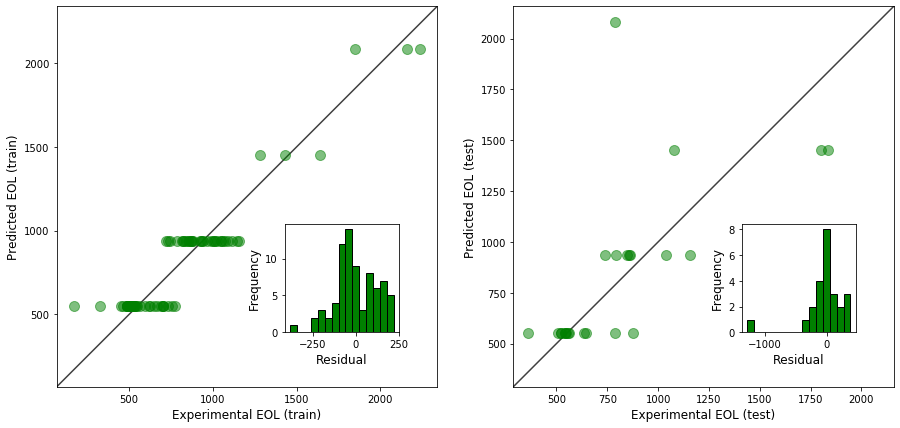

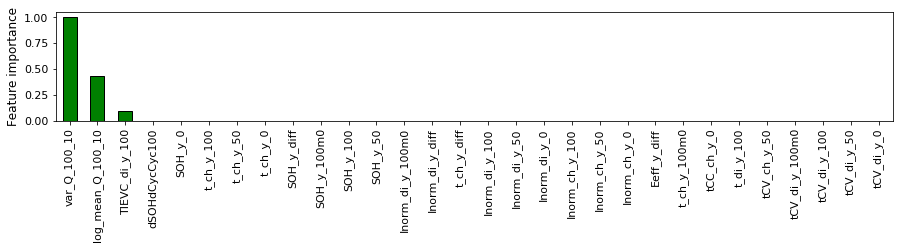

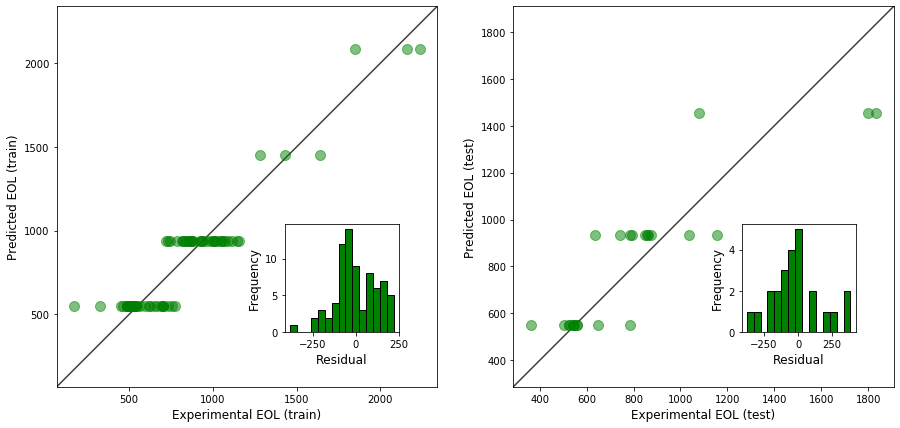

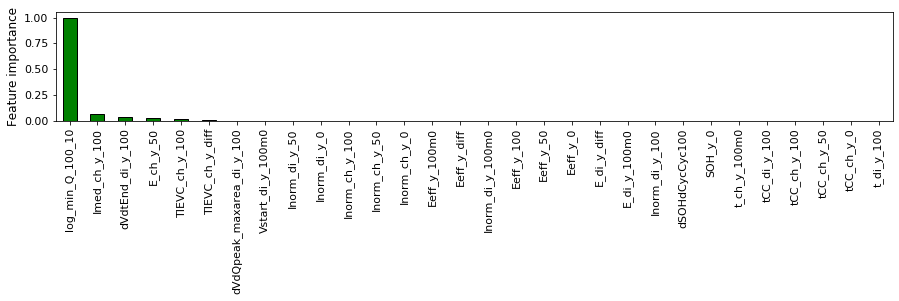

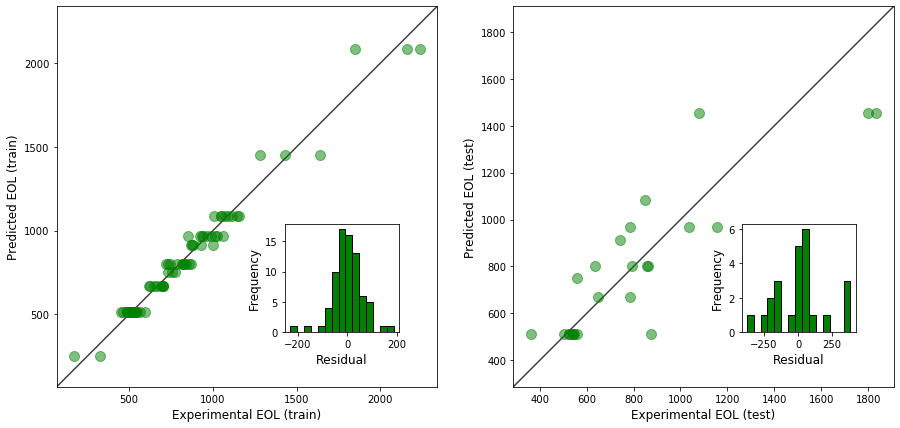

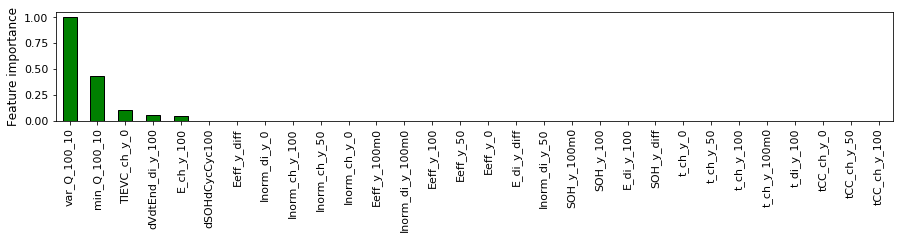

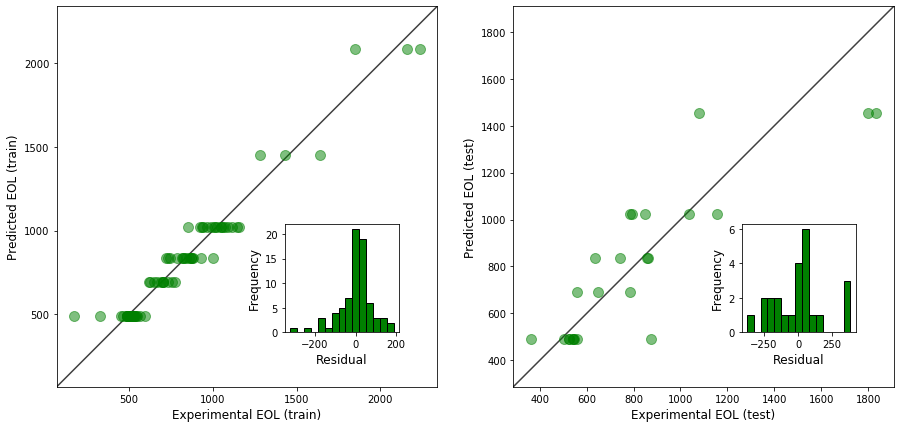

In [31]:
# call the model pipeline function
best_k, best_param, metrics = utils_models.model_pipeline(df=df,
                                                          algo=algo,
                                                          estimator=estimator,
                                                          param_grid=param_grid,
                                                          fname=fname,
                                                          model_type='decision_trees')

In [32]:
metrics

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Train_Corr,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score,Test_Corr
Features used,,,,,,,,,,,,
1.0,57.811942,0.091189,6910.872029,83.131655,0.948914,0.974122,168.009933,0.204203,95793.758237,309.505668,0.269404,0.683886
0.9,49.754924,0.086663,5155.159310,71.799438,0.961893,0.980761,120.104377,0.139112,30052.031788,173.355219,0.770800,0.883889
0.8,96.718764,0.149630,14591.453132,120.795087,0.892138,0.944531,182.116251,0.214501,101661.974127,318.844749,0.224648,0.656498
0.7,96.718764,0.149630,14591.453132,120.795087,0.892138,0.944531,132.364812,0.155427,31937.570599,178.710858,0.756420,0.872062
0.6,43.746842,0.057370,3711.181162,60.919465,0.972567,0.986188,135.940625,0.158623,33893.895311,184.102948,0.741499,0.861763
0.5,57.811942,0.091189,6910.872029,83.131655,0.948914,0.974122,138.285023,0.164592,34286.214745,185.165371,0.738507,0.859578


### Random Forest

In [33]:
# define parameters for model pipeline
estimator = RandomForestRegressor()
param_grid = {"n_estimators": [100, 200, 300, 400, 500],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [2, 3, 4, 5],
              "max_features": ["sqrt", "log2", None]}
algo = utils_models.fit_tree_based_regression
fname = 'random_forest'

0 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.38 seconds
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.45 seconds
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.99 seconds
74 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.5 seconds
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.28 seconds
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.18 seconds


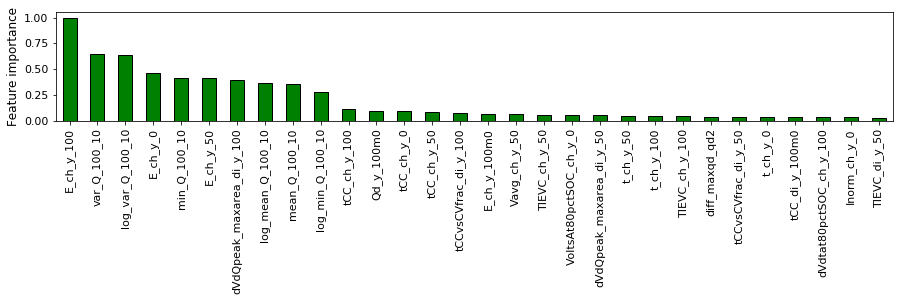

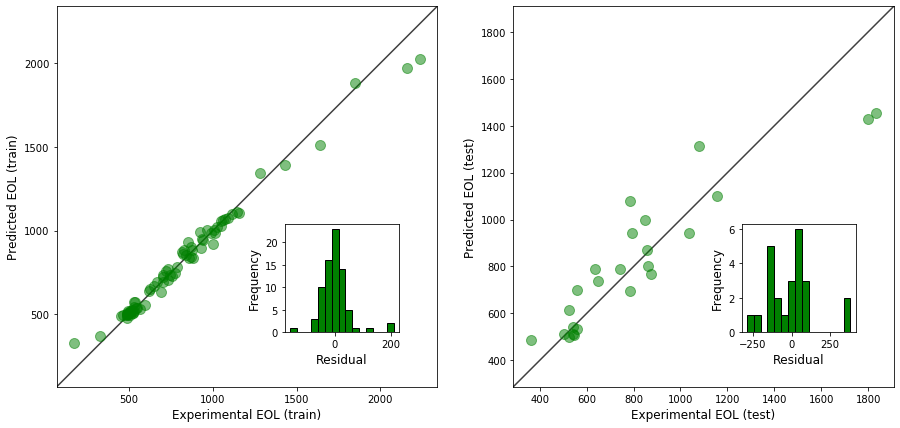

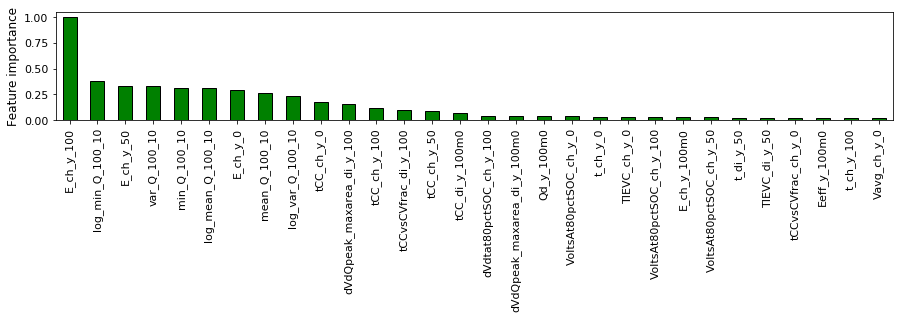

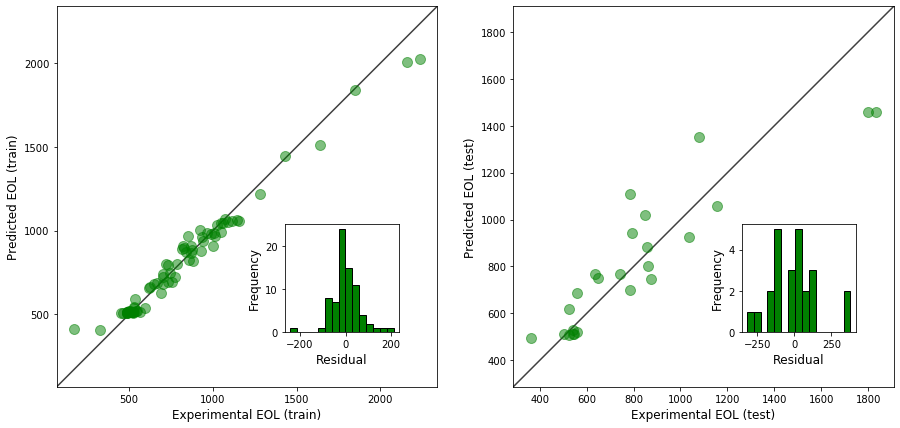

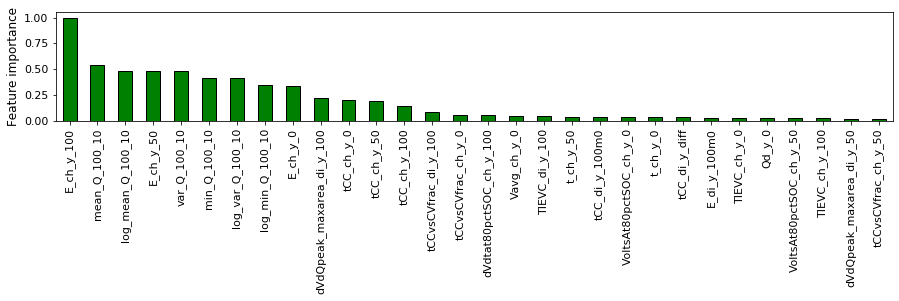

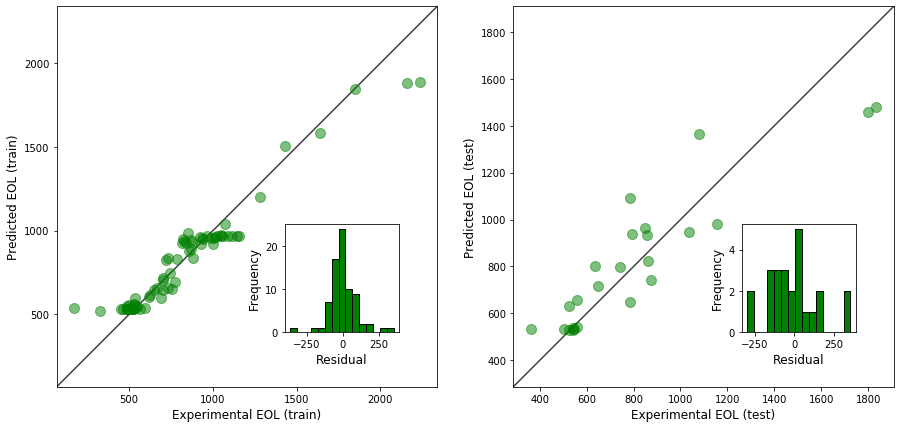

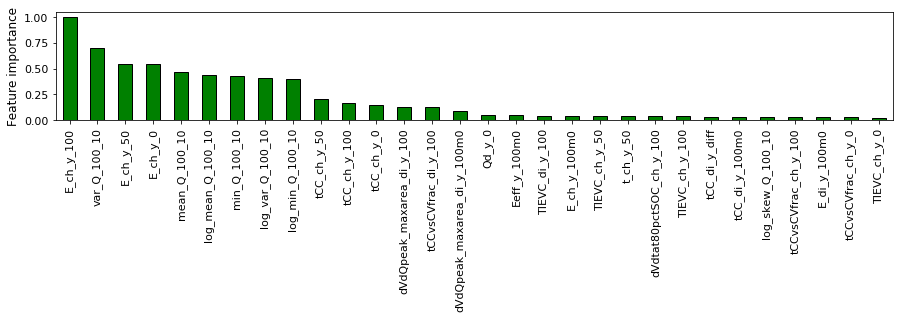

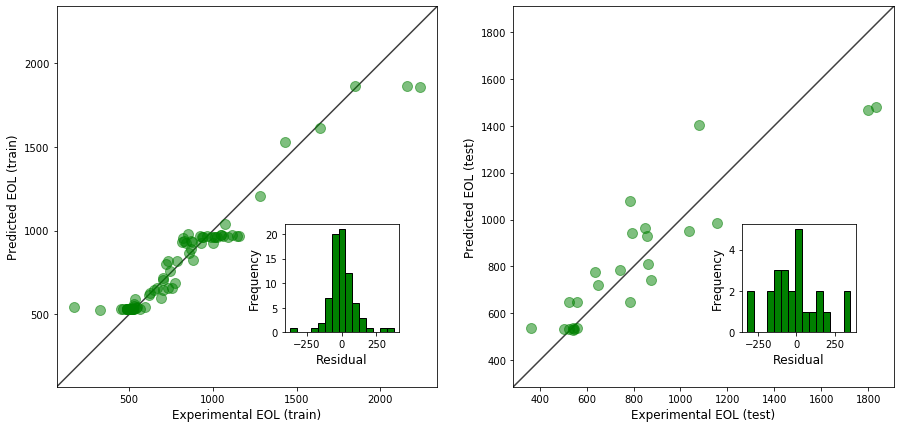

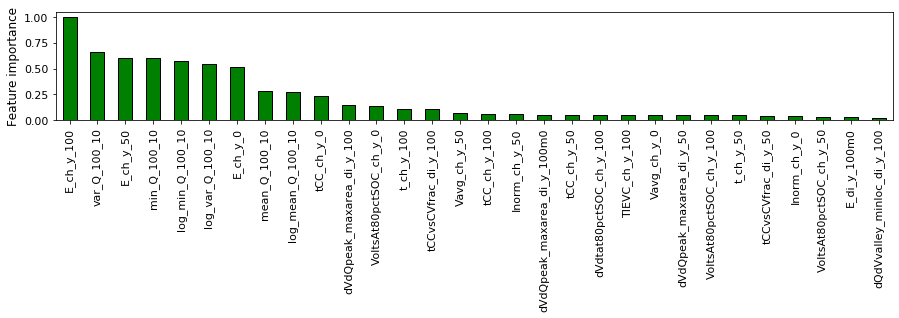

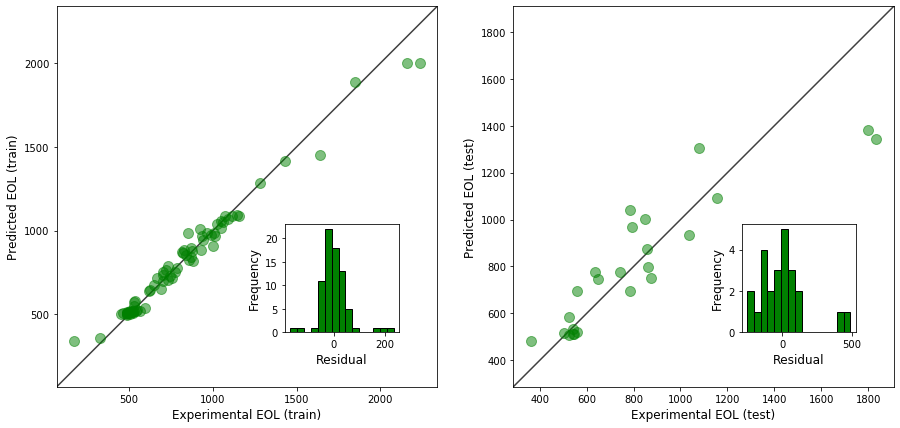

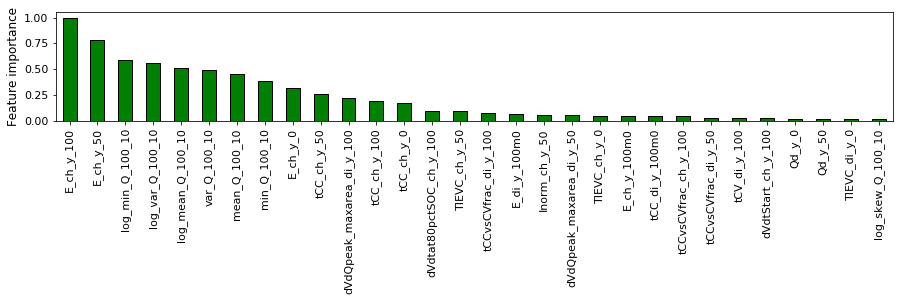

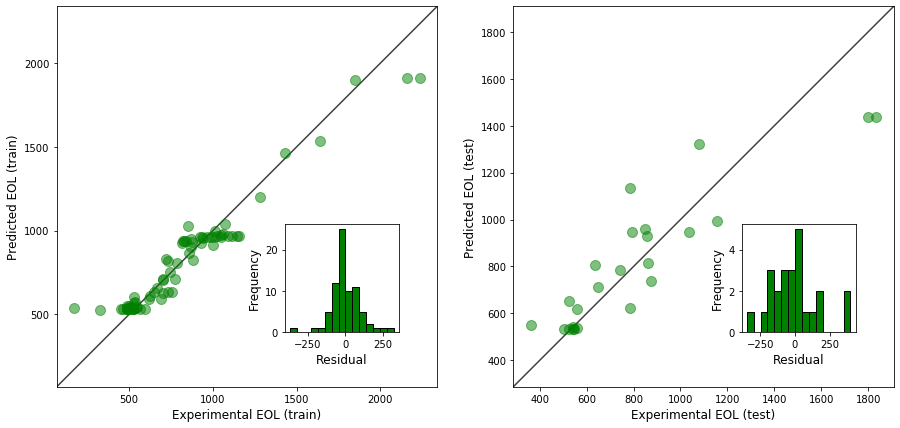

In [34]:
# call the model pipeline function
best_k, best_param, metrics = utils_models.model_pipeline(df=df,
                                                          algo=algo,
                                                          estimator=estimator,
                                                          param_grid=param_grid,
                                                          fname=fname,
                                                          model_type='random_forest')

In [35]:
metrics

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Train_Corr,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score,Test_Corr
Features used,,,,,,,,,,,,
1.0,32.789429,0.048648,2541.904343,50.417302,0.981210,0.993176,115.822990,0.136896,24449.341777,156.362853,0.813531,0.910007
0.9,43.635610,0.069483,3822.095489,61.823098,0.971747,0.989386,120.856652,0.142819,25705.849662,160.330439,0.803948,0.901935
0.8,66.631754,0.106031,9318.953498,96.534727,0.931113,0.972428,122.882766,0.145961,26008.706946,161.272152,0.801638,0.902644
0.7,65.789282,0.104413,9592.456497,97.941087,0.929092,0.970849,123.124538,0.146410,26184.523483,161.816326,0.800297,0.900503
0.6,38.181568,0.056106,3285.786667,57.321782,0.975711,0.990866,121.867565,0.138782,29335.844319,171.277098,0.776262,0.892124
0.5,68.378095,0.109459,9329.477938,96.589223,0.931035,0.971391,126.598084,0.150538,28803.873895,169.717041,0.780320,0.891483
